In [1]:
import os


In [6]:
file_path = r'C:\Users\mhass\Downloads\cell_images\cell_images'

In [7]:
os.listdir(file_path)

['test', 'train']

In [9]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
from matplotlib.image import imread

In [12]:
test_path = file_path + r'\test'
training_path = file_path + r'\train'

In [14]:
os.listdir(test_path)

['parasitized', 'uninfected']

In [15]:
os.listdir(training_path)

['parasitized', 'uninfected']

In [17]:
os.listdir(training_path+r'\parasitized')[0]

'C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [20]:
paracell = training_path + r'\parasitized' + r'\C100P61ThinF_IMG_20150918_144104_cell_162.png'
paracell

'C:\\Users\\mhass\\Downloads\\cell_images\\cell_images\\train\\parasitized\\C100P61ThinF_IMG_20150918_144104_cell_162.png'

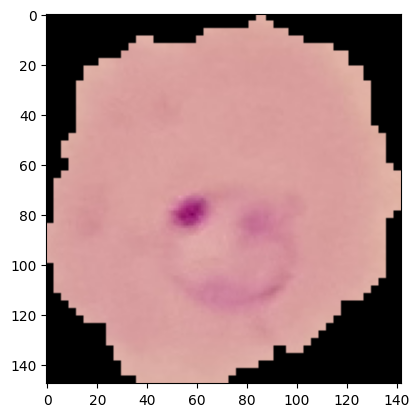

In [24]:
plt.imshow(imread(paracell))

In [26]:
uninfected_cell = training_path + r'\uninfected' + r'\C100P61ThinF_IMG_20150918_144104_cell_128.png'

In [28]:
os.listdir(training_path+r'\uninfected')[0]

'C100P61ThinF_IMG_20150918_144104_cell_128.png'

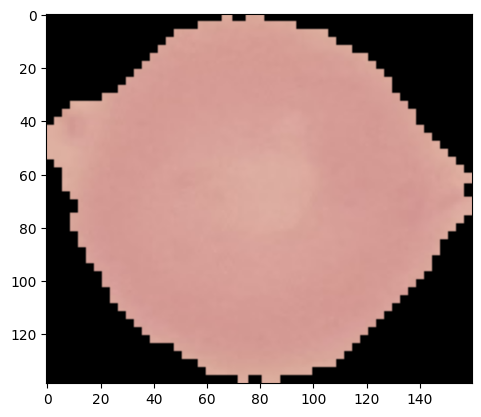

In [29]:
plt.imshow(imread(uninfected_cell))

In [30]:
dim1 = []
dim2 = []
for image_filename in os.listdir(test_path+r'\uninfected'):
    img = imread(test_path + '\\uninfected\\' + image_filename )
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)
     

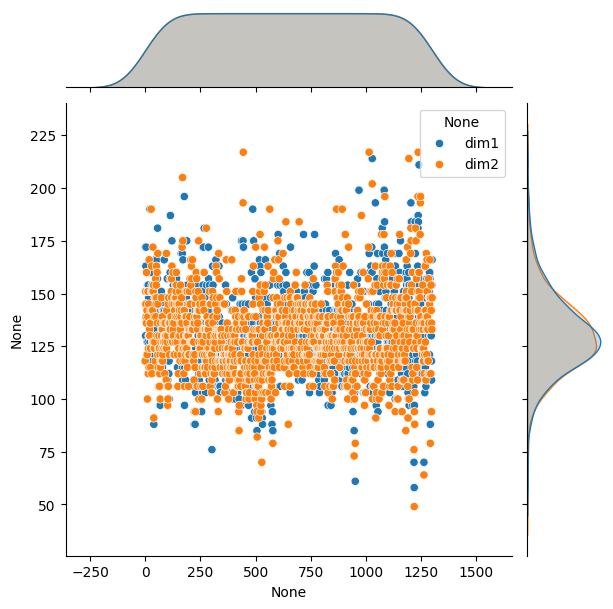

In [38]:
#we need to analysze each image dimension as they all need to be the same for CNN 
df = pd.DataFrame(
    {'dim1': dim1,
    'dim2': dim2}
)
sns.jointplot(data=df)

In [40]:
np.mean(dim1)
np.mean(dim2)

130.75

In [42]:
#this will be trained 130x130x3
img_shape = (130,130,3)

In [43]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [44]:
help(ImageDataGenerator)

Help on class ImageDataGenerator in module keras.src.legacy.preprocessing.image:

class ImageDataGenerator(builtins.object)
 |  ImageDataGenerator(featurewise_center=False, samplewise_center=False, featurewise_std_normalization=False, samplewise_std_normalization=False, zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0, height_shift_range=0.0, brightness_range=None, shear_range=0.0, zoom_range=0.0, channel_shift_range=0.0, fill_mode='nearest', cval=0.0, horizontal_flip=False, vertical_flip=False, rescale=None, preprocessing_function=None, data_format=None, validation_split=0.0, interpolation_order=1, dtype=None)
 |
 |  DEPRECATED.
 |
 |  Methods defined here:
 |
 |  __init__(self, featurewise_center=False, samplewise_center=False, featurewise_std_normalization=False, samplewise_std_normalization=False, zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0, height_shift_range=0.0, brightness_range=None, shear_range=0.0, zoom_range=

In [46]:
img_gen = ImageDataGenerator(rotation_range=20,
                             width_shift_range = 0.1,
                             height_shift_range = 0.1,
                            #  rescale = 1/255
                             shear_range = 0.1,
                             zoom_range = 0.1,
                             horizontal_flip = True,
                             fill_mode = 'nearest'
                             )
#we use rescale to normalize the images

In [51]:
uninfected_cell = (imread(uninfected_cell))

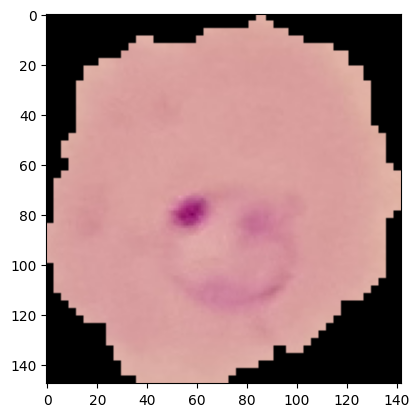

In [71]:
plt.imshow(paracell) 
image_shape = paracell.shape

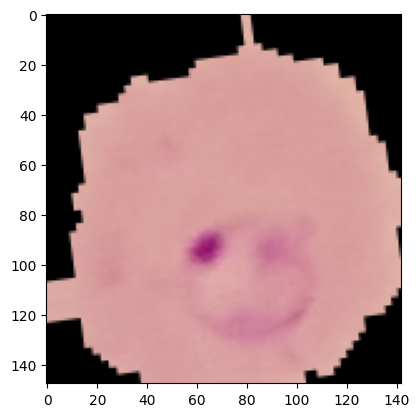

In [61]:
plt.imshow(img_gen.random_transform(paracell))


In [62]:
img_gen.flow_from_directory(training_path)

Found 24958 images belonging to 2 classes.


In [64]:
os.listdir(training_path)

['parasitized', 'uninfected']

In [65]:
img_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


In [66]:
from tensorflow.keras.models import Sequential

In [74]:
from tensorflow.keras.layers import Flatten,Dense, Conv2D, MaxPool2D, Dropout

In [75]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape = (130,130,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape = (130,130,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape = (130,130,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

C:\Users\mhass\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [77]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 62, 62, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 29, 29, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,662,209 (6.34 MB)

 Trainable params: 1,662,209 (6.34 MB)

 Non-trainable params: 0 (0.00 B)

In [78]:
from tensorflow.keras.callbacks import EarlyStopping

In [79]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [82]:
batch_size = 16
image_shape = (130,130,3)

In [83]:
train_image_gen = img_gen.flow_from_directory(training_path, target_size=image_shape[:2], color_mode='rgb', batch_size=batch_size, class_mode='binary')



Found 24958 images belonging to 2 classes.


In [84]:
test_img_gen =train_image_gen = img_gen.flow_from_directory(test_path, target_size=image_shape[:2], color_mode='rgb', batch_size=batch_size, class_mode='binary', shuffle=False)

Found 2600 images belonging to 2 classes.


In [85]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [96]:
res = model.fit(train_image_gen, epochs =20, validation_data = test_img_gen, callbacks = [early_stop])
#this we take a long time to train so we have an already trained model to see the results

Epoch 1/20


C:\Users\mhass\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


163/163 ━━━━━━━━━━━━━━━━━━━━ 37s 218ms/step - accuracy: 0.4276 - loss: 35.5543 - val_accuracy: 0.5262 - val_loss: 0.6898
Epoch 2/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 30s 180ms/step - accuracy: 0.5201 - loss: 0.6973 - val_accuracy: 0.5362 - val_loss: 0.6912
Epoch 3/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 29s 177ms/step - accuracy: 0.5462 - loss: 0.6936 - val_accuracy: 0.5358 - val_loss: 0.6890
Epoch 4/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 28s 170ms/step - accuracy: 0.5395 - loss: 0.6939 - val_accuracy: 0.5431 - val_loss: 0.6902
Epoch 5/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 30s 181ms/step - accuracy: 0.5528 - loss: 0.6901 - val_accuracy: 0.5504 - val_loss: 0.6894


In [86]:
from tensorflow.keras.models import load_model

In [94]:
new_model = load_model('malaria_detector.h5')

ValueError: Kernel shape must have the same length as input, but received kernel of shape (3, 3, 3, 32) and input of shape (None, None, 130, 130, 3).

In [98]:
df_eval = pd.DataFrame(model.history.history)

In [101]:
model.evaluate(test_img_gen)

163/163 ━━━━━━━━━━━━━━━━━━━━ 11s 70ms/step - accuracy: 0.6719 - loss: 0.6652


[0.6882644891738892, 0.5419231057167053]

In [102]:
model.metrics_names

['loss', 'compile_metrics']

In [103]:
pred= model.predict(test_img_gen)

163/163 ━━━━━━━━━━━━━━━━━━━━ 11s 65ms/step


In [104]:
predictions = pred > 0.5
predictions

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

In [105]:
len(pred)

2600

In [106]:
from sklearn.metrics import classification_report, confusion_matrix

In [109]:

print(classification_report(test_img_gen.classes, predictions))

              precision    recall  f1-score   support

           0       0.52      0.68      0.59      1300
           1       0.54      0.37      0.44      1300

    accuracy                           0.53      2600
   macro avg       0.53      0.53      0.52      2600
weighted avg       0.53      0.53      0.52      2600

